In [1]:
#Required Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
from tqdm import tqdm
import sklearn
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

In [10]:
#Read csv file/loading training dataset
data = pd.read_csv('labels_train.csv')

_To shuffle data in dataframe_

In [ ]:
# df = data.sample(frac=1).reset_index(drop=True)

#df.to_csv('\labels_train2.csv', index=False)

#  

#   

In [ ]:
#Feature extraction 
mfc=[]
chr=[]
me=[]
lab=[]
for i in tqdm(range(len(data))):
    f_name='/content/drive/MyDrive/audio_train_1ch/'+str(data.slice_file_name[i])
    x, Fs = librosa.load(f_name,sr=44100, mono=True)
    hop = int(0.01 * Fs) # 10ms
    win = int(0.02 * Fs) # 20ms
    X = librosa.stft(x, n_fft=1024, hop_length=hop, win_length=win, window='hann', center=True, pad_mode='reflect')
    s = np.abs(X)
    mf = np.mean(librosa.feature.mfcc(S=s).T,axis=0)
    mfc.append(mf)
    l=data.Class[i]
    lab.append(l) 
    m = np.mean(librosa.feature.melspectrogram(S=s).T,axis=0)
    me.append(m)
    
    c = np.mean(librosa.feature.chroma_stft(S=s).T,axis=0)
    chr.append(c)


100%|██████████| 1761/1761 [14:08<00:00,  2.08it/s]


In [ ]:
# Saving each feature seperately. This is important as extracting features takes lot of time
mfcc = pd.DataFrame(mfc)
mfcc.to_csv('mfc.csv', index=False)
chrr = pd.DataFrame(chr)
chrr.to_csv('chr.csv', index=False)
mee = pd.DataFrame(me)
mee.to_csv('me.csv', index=False)
la = pd.DataFrame(lab)
la.to_csv('labels.csv', index=False)

In [ ]:
# Concatenating each feature into one
features = []
for i in range(len(mfc)):
    features.append(np.concatenate((me[i], mfc[i], chr[i]), axis=0))

In [ ]:
# Saving the feature
fea = pd.DataFrame(features)
fea.to_csv('features2.csv', index=False)

In [ ]:
len(features)

1761

In [3]:
#extracting features from test
import glob
mfc=[]
chr=[]
me=[]
for filepath in glob.iglob('/content/drive/MyDrive/feats*/*.npy'):
  s = np.load(filepath)
  mf = np.mean(librosa.feature.mfcc(S=s).T,axis=0)
  mfc.append(mf)
  m = np.mean(librosa.feature.melspectrogram(S=s).T,axis=0)
  me.append(m)
  c = np.mean(librosa.feature.chroma_stft(S=s).T,axis=0)
  chr.append(c)

In [4]:
#concatenate train features into single array
features = []
for i in range(len(mfc)):
    features.append(np.concatenate((me[i], mfc[i], chr[i]), axis=0))

In [6]:
#print(len(features))

50


In [7]:
#save test features
fea = pd.DataFrame(features)
fea.to_csv('features2_test.csv', index=False)

In [8]:
# Loading all the csv files
# mfcc = pd.read_csv('mfc.csv')
# chrr = pd.read_csv('chr.csv')
# mee = pd.read_csv('me.csv')
la = pd.read_csv('labels.csv')
features =  pd.read_csv('features2.csv')
features_test = pd.read_csv('features2_test.csv')
# la_test = pd.read_csv('labels_sample_test.csv')

In [11]:
#extracting training classes
lab = []
for i in range(len(data)):
    lab.append(data.Class[i])
# concatenating training and testing features    
result = features.append(features_test)    


In [12]:
len(lab)

1761

In [13]:
# Encoding
la = pd.get_dummies(lab)

label_columns=la.columns

target = la.to_numpy()

In [14]:
# normalize the features
tran = StandardScaler()
features_train = tran.fit_transform(result)

In [16]:
# Train, validation and test data
feat_train=features_train[:1508]

target_train=target[:1508]

y_train=features_train[1508:1761]

y_val=target[1508:1761]

test_data=features_train[1761:]

#test_label=lab[1761:]

In [17]:
print("Training",feat_train.shape)
print(target_train.shape)
print("Validation",y_train.shape)
print(y_val.shape)
print("Test",test_data.shape)
#print(len(test_label))

Training (1508, 160)
(1508, 10)
Validation (253, 160)
(253, 10)
Test (50, 160)


In [18]:
# Model

model = Sequential()

model.add(Dense(160, input_shape=(160,), activation = 'relu'))

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(10, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [19]:
# Model fitting
history = model.fit(feat_train, target_train, batch_size=32, epochs=30, 
                    validation_data=(y_train, y_val))

Epoch 1/30
48/48 [==============================] - 0s 6ms/step - loss: 1.8862 - accuracy: 0.3210 - val_loss: 1.5361 - val_accuracy: 0.4545
Epoch 2/30
48/48 [==============================] - 0s 3ms/step - loss: 1.4588 - accuracy: 0.5046 - val_loss: 1.3021 - val_accuracy: 0.6047
Epoch 3/30
48/48 [==============================] - 0s 3ms/step - loss: 1.1977 - accuracy: 0.6061 - val_loss: 1.0608 - val_accuracy: 0.6917
Epoch 4/30
48/48 [==============================] - 0s 3ms/step - loss: 1.0079 - accuracy: 0.6625 - val_loss: 0.9643 - val_accuracy: 0.6996
Epoch 5/30
48/48 [==============================] - 0s 3ms/step - loss: 0.8711 - accuracy: 0.7036 - val_loss: 0.8398 - val_accuracy: 0.7233
Epoch 6/30
48/48 [==============================] - 0s 3ms/step - loss: 0.7802 - accuracy: 0.7367 - val_loss: 0.7696 - val_accuracy: 0.7866
Epoch 7/30
48/48 [==============================] - 0s 3ms/step - loss: 0.7213 - accuracy: 0.7653 - val_loss: 0.7414 - val_accuracy: 0.7668
Epoch 8/30
48/48 [==

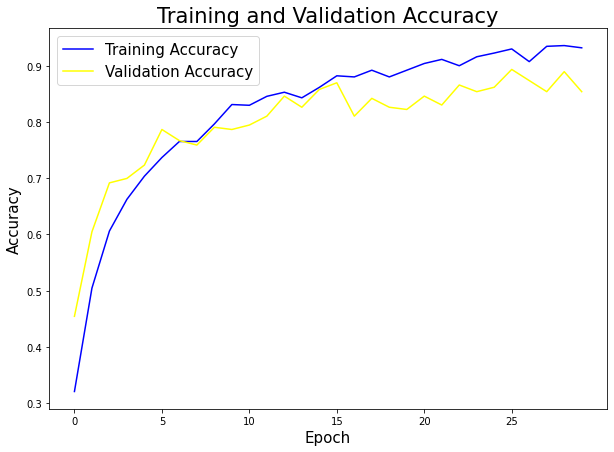

In [20]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(10, 7))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_acc, label='Training Accuracy', color='blue')
plt.plot(val_acc, label='Validation Accuracy', color='yellow')

# Set title
plt.title('Training and Validation Accuracy', fontsize = 21)
plt.xlabel('Epoch', fontsize = 15)
plt.legend(fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.xticks(range(0,30,5), range(0,30,5));

In [21]:

# To predict the labels of test data
predict = model.predict_classes(test_data)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [22]:
# To match the labels
prediction=[]
for i in predict:
  j=label_columns[i]
  prediction.append(j)

#  

#  

_Trying some input in our model_

In [24]:
#predicting the test labels
for i in range(len(prediction)):
  print(prediction[i])

children_playing
jackhammer
engine_idling
jackhammer
dog_bark
children_playing
children_playing
children_playing
children_playing
dog_bark
dog_bark
dog_bark
children_playing
dog_bark
air_conditioner
engine_idling
dog_bark
drilling
dog_bark
engine_idling
children_playing
drilling
engine_idling
engine_idling
gun_shot
engine_idling
drilling
street_music
dog_bark
children_playing
children_playing
dog_bark
drilling
siren
gun_shot
children_playing
dog_bark
engine_idling
gun_shot
gun_shot
drilling
drilling
street_music
children_playing
dog_bark
dog_bark
street_music
engine_idling
dog_bark
street_music


In [32]:
est = pd.DataFrame(prediction)
est.to_csv('est.csv', index=False)

In [ ]:
#Matching predicted and actual test labels
# k =0
# for i in range(len(test_label)):
#   if test_label[i] == prediction[i]:
#     k = k+1
# k
# len(test_label)
# accuracy = k/len(test_label)
